<a href="https://colab.research.google.com/github/ludutram/LucianaDutra/blob/master/Descida_Gradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from matplotlib import cm

In [15]:
def func(x,y):
  return (x**2) * np.sin(y)

In [16]:
def grad(x,y):
  return np.array([2*x*np.sin(y),(x**2)*np.cos(y)]) #derivada parcial da função(x,y) para calcular o gradiente. Gradiente é um vetor de duas dimnensões

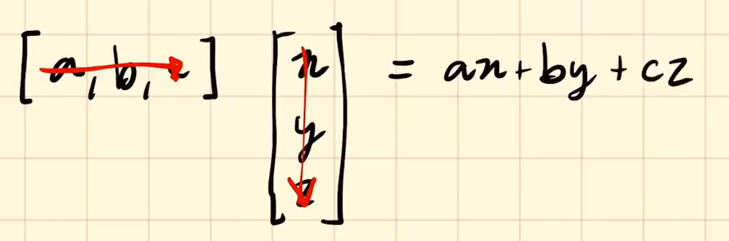

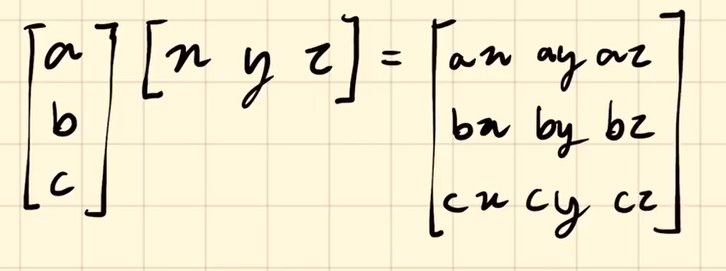

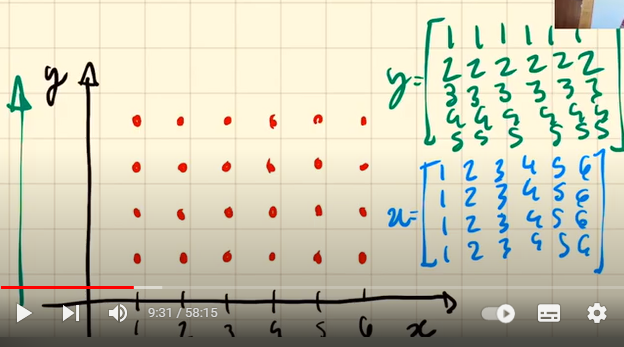

In [17]:
x = np.outer(np.linspace(-5.0, 5.0,100), np.ones(100))
y = np.outer(np.ones(100), np.linspace(-5.0, 5.0,100))
z= func(x,y)

Text(0.5, 0, 'eixo z')

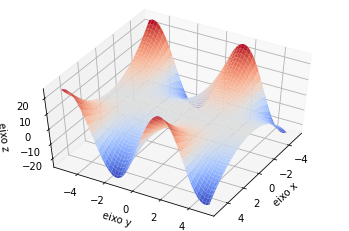

In [18]:
ax = plt.axes(projection='3d')
ax.view_init(50,30) # ângulo de observação
ax.plot_surface(x,y,z, cmap=cm.coolwarm) # cores do gráfico
ax.set_xlabel('eixo x')
ax.set_ylabel('eixo y')
ax.set_zlabel('eixo z')

Text(0, 0.5, 'eixo y')

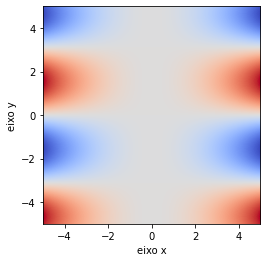

In [20]:
ax = plt.axes()
ax.imshow(-z.T, cmap=cm.coolwarm, extent=(-5, 5, -5, 5), interpolation= 'bilinear')
ax.set_xlabel('eixo x')
ax.set_ylabel('eixo y')

In [22]:
#criar listas vazias
qx = []
qy = []
qu = []
qv = []

for xi in np.linspace(-1.5*np.pi,1.5*np.pi,15):   #intervalo de 15 valores
  for yi in np.linspace(-1.5*np.pi,1.5*np.pi,15):
    ui, vi = grad(xi,yi)      #cálcula o gradiente, tupla o ui é o primeiro elemento do array e o vi é o segundo elemento
    qx.append(xi)  #guarda o x em lista
    qy.append(yi)  #guarda o y em lista
    qu.append(ui)    #resultado do gradiente
    qv.append(vi)    #resultado do gradiente

Text(0, 0.5, 'eixo y')

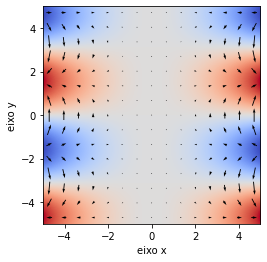

In [24]:
ax = plt.axes()   #cria nova figura
ax.imshow(-z.T, cmap=cm.coolwarm, extent=(-5, 5, -5, 5), interpolation= 'bilinear')
Q = ax.quiver(qx,qy,qu,qv, scale=360.0, pivot='mid') #cria setinhas de qx,qy,qu e qv - apontam a direção do gradiente e a sua magnitude
qk = ax.quiverkey(Q, 0.1, 0.1, 0.1,'', labelpos='E', coordinates = 'figure')
ax.set_xlabel('eixo x')
ax.set_ylabel('eixo y')


In [25]:
print(func(2,-2))

-3.637189707302727


In [26]:
print(grad(2,-2))

[-3.63718971 -1.66458735]


NOVA FUNÇÃO 

In [32]:
def func3d(x):  #função de variáveis de estados ARRAY
  x1,x2 = x    # vetor x é composto por dois valores, o "x" vira um VETOR DE ESTADOS , o X possui as entradas x1 e x2
  f=0.8        #coeficiente ???
  return np.cos(x1*f)*(25 - x1**2) - np.cos(x2*f)*(25 - x2**2)

In [42]:
#CÁLCULO DA DESCIDA DO GRADIENTE - CÁLCULO DAS DERIVADAS PARCIAIS
def grad3d(x):                #
  x1, x2 = x                  # vetor x é composto por dois valores, o "x" vira um VETOR DE ESTADOS
  h = 0.01                    #variação da coordenada tendendo a zero
  h1 = np.array([h, 0.0])     #vetor h1 tbm composto por dois valores
  h2 = np.array([0.0, h])     #vetor h1 tbm composto por dois valores
  z = func3d(x)                #grava o valor de z para ficar calculando duas vezes.
  df_dx1 = (func3d(x+h1) - z)/h  #cálculo de derivadas parciais  em um vetor x
  df_dx2 = (func3d(x+h2) - z)/h  #cálculo de derivads parciais em um vetor y
  return np.array([df_dx1,df_dx2])

In [51]:
#valor inicial da DESCIDA DO GRADIENTE e o tamanho de passos (nº passos usou valor padrão)
def grad_desc(x, step=0.005):
  # [novo x] = [x anterior] - [passo] * [direção do gradiente] : pequenos passos em direção contrária a função gradiente naquele ponto x
  x = x - step * grad3d(x)   
  return x                    #retorna um novo x
  #isso otimiza a função para procura o mínimo da função

In [52]:
#intervalo no eixo x (array x)
x = np.array([np.outer(np.linspace(-5.0, 5.0,100), np.ones(100)), np.outer(np.ones(100), np.linspace(-3.0, 7.0,100))])  
z= func3d(x)   #z é um variável que recebe a função 

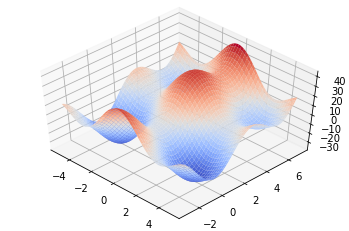

In [53]:
ax = plt.axes(projection='3d')
ax.view_init(50, -45)
ax.plot_surface(x[0,:], x[1,:], z, cmap=cm.coolwarm)
#plt.axis('off')

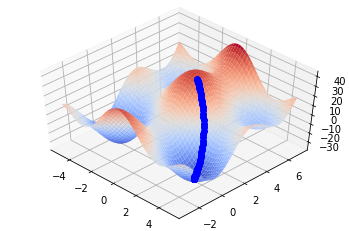

In [54]:
xi = np.array([0.5, 3.0])   #ponto inicial de x = x0 
xs = []                     #lista vazia para guardar o próximo valor de x
zs = []                     #lista vazia para guardar o próximo valor de z
for i in range(100):
  zi = func3d(xi)             #valor da função no xi
  xs.append(xi)               #acrescenta valor de x no vetor [xs] no próximo passo
  zs.append(zi)               #acrescenta valor de z no vetor [zs] no próximo passo
  xi = grad_desc(xi)          # calcula o novo ponto xi com o decremento de x ocasionado pela descida do gradiente

xs = np.array(xs)
zs = np.array(zs)
ax = plt.axes(projection='3d')
ax.view_init(50, -45)
ax.plot_surface(x[0,:], x[1,:], z, cmap=cm.coolwarm)
ax.plot(xs[:,0], xs[:,1], zs, 'o', c='b', zorder=100)  #pega todas as colunas e vejo o valor de x1 e x2 na coluna
#plt.axis('off')